### Saheed Adisa Ganiyu
### Numerical Method Algorithms

In [193]:
#importing the necessary modules
import numpy as np
from matplotlib import pyplot as plt
import math

In [194]:
def vec_Pnorm(x, p=2):
    """
    This function computes the p_norm of a vector: 1<=p<=\infty
    
    INPUT:
        
        - `x` vector
        
        - `p` - the type of norm to be computed.
        If `p` is omited, it will be computed. because, it has a default value as 2
        
    OUTPUT:
            -It returns a scalar value.
    """
    if p == float("inf"):
        return max(x)
    x = np.array(x)
    res = (np.sum(x**p)**(1/p))
    return res

In [195]:
def sign(x):
    """
    This function computes the sign of given number, if x>=0, return 1 else -1.
    INPUT:
        - `x` a given real number.
    OUTPUT:
            return 1 0r -1
    """
    if x >= 0:
        return 1
    return -1

### Problem 1: Back-Substitution
We implement this algorithm for back substitution

Algorithm 17.1. Back Substitution
$$
\begin{aligned}
x_m &=b_m / r_{m m} \\
x_{m-1} &=\left(b_{m-1}-x_m r_{m-1, m}\right) / r_{m-1, m-1} \\
x_{m-2} &=\left(b_{m-2}-x_{m-1} r_{m-2, m-1}-x_m r_{m-2, m}\right) / r_{m-2, m-2} \\
& \vdots \\
x_j &=\left(b_j-\sum_{k=j+1}^m x_k r_{j k}\right) / r_{j j}
\end{aligned}
$$

In [196]:
def back_subt(R, b):
    """
    This function computes the solution of a linear system using back-substitution method.
    
    INPUT:
    
        - `R` a sqaure upper-triangular matrix.
        - `b` a vector b computes the solution to a linear system.
    OUTPUT:
    
        - `x` the vector solution.

    """
    n = np.size(b)
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        tmp = b[i]
        for j in range(n-1, i, -1):
            tmp -= x[j]*R[i,j]
        x[i] = tmp/R[i,i]
    return x

In [197]:
#stuff to bold a text in printing
start = "\033[1m"
end = "\033[0;0m"

In [198]:
#Testrun for back substitution
R = np.mat([[-1,1,1,2,3],[0,-1,1,1,2],[0,0,-1,1,1],[0,0,0,-1,1],[0,0,0,0,-1]]); print("R = \n",R)      #creating upper triangular matrix
b = np.array([27,15,6,1,-5]); print("\n b = ",b)
x=back_subt(R, b)         #executing back substitution
print("\n"+start+ " The solution x = "+ end,x)

R = 
 [[-1  1  1  2  3]
 [ 0 -1  1  1  2]
 [ 0  0 -1  1  1]
 [ 0  0  0 -1  1]
 [ 0  0  0  0 -1]]

 b =  [27 15  6  1 -5]

 The solution x =  [1. 2. 3. 4. 5.]


**Notice:** The solution $(\bar{x}) = [1, 2, 3, 4, 5,]$

In [199]:
#Verification: here we verify by ||Rx - b||/||b|| i.e relative error
Rx = R.dot(x)
Rx_b = Rx - b
norm_Rx_b = vec_Pnorm(Rx_b)
norm_b = vec_Pnorm(b)
rel_err = norm_Rx_b/norm_b
print(start+ " Relative Error = "+ end,rel_err)

 Relative Error =  0.0


**Observation:** The just above result aserts the statement which says "a backward stable algorithm gives exactly the right answer
to nearly the right question".

### Problem 2: Householder Triangulization
We implement this following algorithm

$$
\begin{aligned}
Q^{\text {star }}=&I_{(m \times m)}\\
R=&A\\
n_{\text {end }}=&n\\
\text { if }(n=&m) n_{\text {end }}=n-1\\
\text { for } k=&1 \text { to } n_{\text {end }}\\
&x=R_{k: m, k}\\
&v_k=\operatorname{sign}\left(x_1\right)\|x\|_2 e_1+x\\
&v_k=v_k /\left\|v_k\right\|_2\\
&R_{k: m, k: n}=R_{k: m, k: n}-2 v_k\left(v_k^*\right) R_{k: m, k: n}\\
&Q_{k: m,:}^{\text {star }}=Q_{k: m,:}^{\text {star }}-2 v_k\left(v_k^*\right) Q_{k: m,:}^{\text {star }}\\
\text{ end for }&\\
Q=&\left(Q^{\text {star }}\right)^*
\end{aligned}
$$

In [200]:
#Household Triangular function
import copy as cp
def Hsd_Trig(A):
    """
    This function computes QR-factorization of a given a rectangular matrix
    using Householder triangularization method.
    
    INPUT:
        - `A` a rectangular matrix (m x n) such that m>=n.
    OUTPUT:
        - `Q` the square unitary matrix
        - `R` the uper triangular matrix
    """
    m = np.shape(A)[0]
    n = np.shape(A)[1]
    n_end = n
    R = cp.deepcopy(np.asmatrix(A, dtype='float64'))
    Q_star = np.eye(m,m)
    if n==m:
        n_end = n-1
    for k in range(n_end):
        x = np.array(R[k:m,k]).ravel()
        x_1 = x[0]
        e_1 = np.array([1] + [0]*(len(x)-1))
        norm_x = vec_Pnorm(x)
        vk = sign(x_1)*norm_x*e_1 + x
        vk = vk/vec_Pnorm(vk)
        out_vk = np.outer(vk,vk.T)
        R[k:m,k:n] = R[k:m,k:n] - np.matmul(2*out_vk,R[k:m,k:n])
        Q_star[k:m,:] = Q_star[k:m,:] - np.matmul(2*out_vk,Q_star[k:m,:])
    return np.asmatrix(Q_star).T, R

In [201]:
#Testrun for Householder triangularization
A=np.mat([[2,-2,18],[2,1,0],[1,2,0]])
Q_, R_ = Hsd_Trig(A)          #decomposing into QR-factorization
print(start+" The outcomes are the following: "+end)
print("A =")
print(A)
print("\n Q =")
print(Q_)
print("\n R =")
print(R_)

 The outcomes are the following: 
A =
[[ 2 -2 18]
 [ 2  1  0]
 [ 1  2  0]]

 Q =
[[-0.66666667  0.66666667  0.33333333]
 [-0.66666667 -0.33333333 -0.66666667]
 [-0.33333333 -0.66666667  0.66666667]]

 R =
[[-3.00000000e+00  4.44089210e-16 -1.20000000e+01]
 [ 2.22044605e-16 -3.00000000e+00  1.20000000e+01]
 [ 1.11022302e-16  0.00000000e+00  6.00000000e+00]]


In [202]:
#Verifying
A=np.mat([[2,-2,18],[2,1,0],[1,2,0]])
Q,R =Hsd_Trig(A)        #decomposing into QR-factorization
print("Verifying the decomposition i.e. if A==QR")
print(A==np.matmul(Q,R).round())
print("\n Verifying the unitary of Q, i.e. if Q*Q==QQ*")
print(np.matmul(Q.T,Q).round()==np.matmul(Q,Q.T).round())

Verifying the decomposition i.e. if A==QR
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]

 Verifying the unitary of Q, i.e. if Q*Q==QQ*
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


### Problem 3: Polynomial interpolation and approximation


In [203]:
def Vmd(a,b,m=4,n=4):
    """
    This function generate Vandermonde matrix based on given interval and dimension
    
    INPUT:
        - `a` the lower bound of the interval
        - `b` the upper bound of the interval
        - `m` the number of matrix row
        - `n` the number of matrix columns
        
    OUTPUT:
        - `V` the vandermonde matrix
    """
    x = np.linspace(a,b,m)
    v = np.asmatrix([x**i for i in range(n)])
    return v.T

#### Problem 3(a)

In [204]:
#Computing Vandermonde matrix and its QR-factorization for problem 3(a) 
Vm1=Vmd(a=0,b=3,m=4,n=4)
Q,R =Hsd_Trig(Vm1)       #decomposing into QR-factorization
print(start+" The outcomes are the following: "+end)
print("V =")
print(Vm1)
print("\n Q =")
print(Q)
print("\n R =")
print(R)

 The outcomes are the following: 
V =
[[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  3.  9. 27.]]

 Q =
[[-0.5        -0.67082039  0.5        -0.2236068 ]
 [-0.5        -0.2236068  -0.5         0.67082039]
 [-0.5         0.2236068  -0.5        -0.67082039]
 [-0.5         0.67082039  0.5         0.2236068 ]]

 R =
[[-2.00000000e+00 -3.00000000e+00 -7.00000000e+00 -1.80000000e+01]
 [-2.22044605e-16  2.23606798e+00  6.70820393e+00  1.96773982e+01]
 [-2.22044605e-16  3.33066907e-16  2.00000000e+00  9.00000000e+00]
 [-2.22044605e-16  6.66133815e-16 -1.11022302e-16  1.34164079e+00]]


In [205]:
#Finding solution of Vm.a = y by computing Y = Q*b and solving R.a=Y for problem 3(a)
ym1_bar = np.array([1,2,3,1])
Y1 = np.matmul(Q.T,ym1_bar)
Y1 = np.array(Y1).ravel()
#print("Y =",Y1)
a_bar = back_subt(R, Y1)
print("\n The solution a_bar = ", a_bar)


 The solution a_bar =  [ 1.00000000e+00 -7.94410929e-16  1.50000000e+00 -5.00000000e-01]


**Notice:** The solution $(\bar{a}) = [ 1.00000000e+00, -7.94410929e-16,  1.50000000e+00, -5.00000000e-01]$

In [206]:
#Considering when M=257 for problem 3(a)
VM1=Vmd(a=0,b=3,m=257,n=4)
yM1_bar=np.matmul(VM1,a_bar)
yM1_bar=np.array(yM1_bar).ravel()

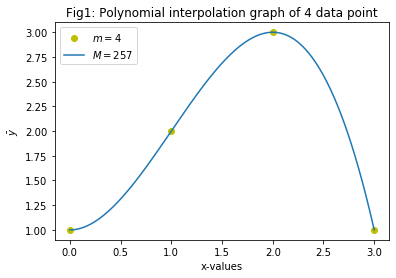

In [207]:
#Ploting 
a=0;b=3;m=4;n=4; M=257
xm1 = np.linspace(a,b,m)
xM1 = np.linspace(a,b,M)
plt.plot(xm1,ym1_bar, 'bo', color='y', label=r'$m=4$')
plt.plot(xM1,yM1_bar,label=r'$M=257$')
plt.title(r"Fig1: Polynomial interpolation graph of 4 data point")
plt.xlabel('x-values')
plt.ylabel(r'$\bar{y}$')
plt.legend()
plt.show()

**Remark:** the fig1 displays polynomial interpolation of 4 points data in which P(x) passes through all of them and follows the same pattern, this shows well depicted form of given data.


#### Problem 3(b)

In [208]:
#Computing Vandermonde matrix and its QR-factorization for problem 3(b)
a=0;b=3;m=7;n=4
Vm2=Vmd(a=0,b=3,m=7,n=4)
Q2,R2 =Hsd_Trig(Vm2)        #decomposing into QR-factorization
print(start+" The outcomes are the following: "+end)
print("V =")
print(Vm2)
print("\n Q =")
print(Q2)
print("\n R =")
print(R2)

 The outcomes are the following: 
V =
[[ 1.     0.     0.     0.   ]
 [ 1.     0.5    0.25   0.125]
 [ 1.     1.     1.     1.   ]
 [ 1.     1.5    2.25   3.375]
 [ 1.     2.     4.     8.   ]
 [ 1.     2.5    6.25  15.625]
 [ 1.     3.     9.    27.   ]]

 Q =
[[-3.77964473e-01 -5.66946710e-01  5.45544726e-01 -4.08248290e-01
  -1.36221063e-01 -2.20533053e-01 -6.50965905e-02]
 [-3.77964473e-01 -3.77964473e-01 -4.99600361e-16  4.08248290e-01
   3.97563213e-01  5.13341461e-01  3.55025470e-01]
 [-3.77964473e-01 -1.88982237e-01 -3.27326835e-01  4.08248290e-01
  -1.90659606e-01 -1.05326519e-01 -7.07230010e-01]
 [-3.77964473e-01  5.55111512e-17 -4.36435780e-01 -3.33066907e-16
  -4.88572443e-01 -3.01447479e-01  5.80597151e-01]
 [-3.77964473e-01  1.88982237e-01 -3.27326835e-01 -4.08248290e-01
   6.77358785e-01 -2.89117269e-01 -7.22172357e-02]
 [-3.77964473e-01  3.77964473e-01  2.77555756e-17 -4.08248290e-01
  -2.96851500e-01  6.60374061e-01 -1.52984749e-01]
 [-3.77964473e-01  5.66946710e-01  5

In [209]:
#Finding solution of Vm.a = y by computing Y = Q*b and solving R.a=Y for problem 3(b)
ym2_bar = np.array([1, 2, 3, 1, 0, 2, 1])
Y2 = np.matmul(Q2.T,ym2_bar)
Y2 = np.array(Y2).ravel()
#print("Y =",Y2)
R_2 = x = np.delete(R2, range(m-n+1,m), axis=0)       #removing the silent rows of R
Y2 = Y2[0:n]          #making Y to be in conformable form by rmoving some lower elements
a_bar = back_subt(R2, Y2)
print("\n The Solution a_bar =", a_bar)


 The Solution a_bar = [ 1.07142857  3.54761905 -3.14285714  0.66666667]


**Notice:** The solution $(\bar{a}) = [ 1.07142857,  3.54761905, -3.14285714,  0.66666667]$

In [210]:
#Considering when M=257 for problem 3(b)
VM2=Vmd(a=0,b=3,m=257,n=4)
yM2_bar=np.matmul(VM2,a_bar)
yM2_bar=np.array(yM2_bar).ravel()

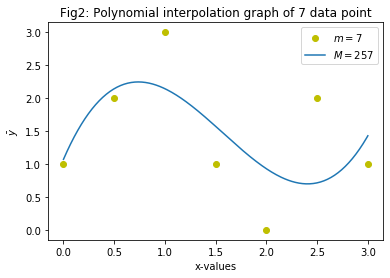

In [211]:
#Ploting 
a=0;b=3;m=7;n=4; M=257
xm2 = np.linspace(a,b,m)
xM2 = np.linspace(a,b,M)
plt.plot(xm2,ym2_bar, 'bo', color='y', label=r'$m=7$')
plt.plot(xM2,yM2_bar,label=r'$M=257$')
plt.title(r"Fig2: Polynomial interpolation graph of 7 data point")
plt.xlabel('x-values')
plt.ylabel(r'$\bar{y}$')
plt.legend()
plt.show()

**Remark:** the fig2 displays polynomial interpolation of 7 points data in which P(x) passes through none of them but nearly have the same flow of pattern, this shows wrong interpolation of those points and calls for adjustment.


#### Problem 3(c)

In [212]:
#Computing Vandermonde matrix and its QR-factorization for problem 3(c) 
Vm3=Vmd(a=-3,b=3,m=15,n=15)
Q3,R3 =Hsd_Trig(Vm3)       #decomposing into QR-factorization
#print("V =")
#print(Vm3)
#print("\n Q =")
#print(Q3)
#print("\n R =")
#print(R3)

In [213]:
#Finding solution of Vm.a = y by computing Y = Q*b and solving R.a=Y for problem 3(c)
temp =np.array(Vm3[:,1]).ravel() #extracting the column 2 of the generated V. matrix
ym3_bar = np.array([1/(1+x**2) for x in temp])
Y3 = np.matmul(Q3.T,ym3_bar)       #computing Q*b
Y3 = np.array(Y3).ravel()
#print("Y =",Y3)
a_bar = back_subt(R3, Y3)         # computing Ra=Y
print("\n The Solution a_bar =", a_bar)


 The Solution a_bar = [ 1.00000000e+00  2.86666592e-13 -9.80386478e-01 -3.88924376e-13
  8.18949638e-01  1.94380983e-13 -4.68959572e-01 -6.29687357e-14
  1.60489229e-01  1.40308823e-14 -3.04873504e-02 -1.67472522e-15
  2.92491380e-03  7.56666910e-17 -1.09488752e-04]


**Notice:** The solution $(\bar{a}) = [ 1.00000000e+00,  2.86666592e-13, -9.80386478e-01, -3.88924376e-13,
  8.18949638e-01,  1.94380983e-13, -4.68959572e-01, -6.29687357e-14,
  1.60489229e-01,  1.40308823e-14, -3.04873504e-02, -1.67472522e-15,
  2.92491380e-03,  7.56666910e-17, -1.09488752e-04]$

In [214]:
#Considering when M=257 for problem 3(c)
VM3=Vmd(a=-3,b=3,m=257,n=15)
yM3_bar=np.matmul(VM3,a_bar)
yM3_bar=np.array(yM3_bar).ravel()

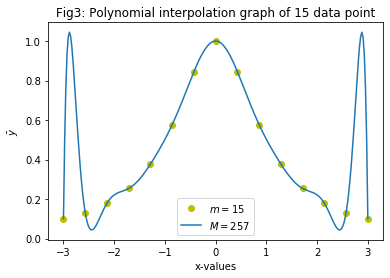

In [215]:
#Ploting 
a=-3;b=3;m=15;n=15; M=257
xm3 = np.linspace(a,b,m)
xM3 = np.linspace(a,b,M)
plt.plot(xm3,ym3_bar, 'bo', color='y', label=r'$m=15$')
plt.plot(xM3,yM3_bar,label=r'$M=257$')
plt.title(r"Fig3: Polynomial interpolation graph of 15 data point")
plt.xlabel('x-values')
plt.ylabel(r'$\bar{y}$')
plt.legend()
plt.show()

**Remark:** Fig3 depicts polynomial interpolation of 15 point data almost in the form of a normal distribution graph, and P(x) passes through all of the points, but it is not completely satisfied because P(x) exhibits large oscillation at the end of the interval, which occurs as a result of an artifact of the interpolation process and is not a reasonable reflection of the data.

#### Problem 3(d)

In [216]:
#Computing Vandermonde matrix and its QR-factorization for problem 4(c) 
Vm4=Vmd(a=-3,b=3,m=45,n=15)
Q4,R4 =Hsd_Trig(Vm4)       #decomposing into QR-factorization
#print("V =")
#print(Vm4)
#print("\n Q =")
#print(Q4)
#print("\n R =")
#print(R4)

In [217]:
#Finding solution of Vm.a = y by computing Y = Q*b and solving R.a=Y for problem 4(c)
a=-3;b=3;m=45;n=15
temp =np.array(Vm4[:,1]).ravel()
ym4_bar = np.array([1/(1+x**2) for x in temp])
Y4 = np.matmul(Q4.T,ym4_bar)
Y4 = np.array(Y4).ravel()
#print("Y =",Y4)
R_4 = x = np.delete(R4, range(m-n+1,m), axis=0)  #removing silent rows from R
Y4 = Y4[0:n]        #making Y to be in conformable form by rmoving some lower elements
a_bar = back_subt(R4, Y4)
print("\n The Solution a_bar =", a_bar)


 The Solution a_bar = [ 9.93883127e-01  1.56624149e-14 -8.78887790e-01 -7.56290273e-14
  5.52329021e-01  7.04454861e-14 -2.15408582e-01 -2.79759281e-14
  4.98581292e-02  5.40763294e-15 -6.62146681e-03 -5.03165488e-16
  4.64300731e-04  1.80521072e-17 -1.32902534e-05]


**Notice:** The solution $(\bar{a}) = [ 9.93883127e-01  1.56624149e-14 -8.78887790e-01 -7.56290273e-14
  5.52329021e-01  7.04454861e-14 -2.15408582e-01 -2.79759281e-14
  4.98581292e-02  5.40763294e-15 -6.62146681e-03 -5.03165488e-16
  4.64300731e-04  1.80521072e-17 -1.32902534e-05]$

In [218]:
#Considering when M=257 for problem 3(d)
VM4=Vmd(a=-3,b=3,m=257,n=15)
yM4_bar=np.matmul(VM4,a_bar)
yM4_bar=np.array(yM4_bar).ravel()

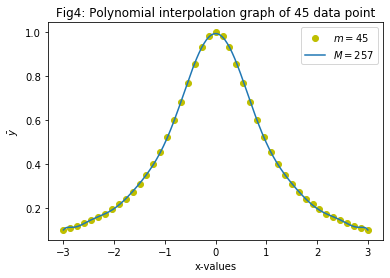

In [219]:
#Ploting 
a=-3;b=3;m=45;n=15; M=257
xm4 = np.linspace(a,b,m)
xM4 = np.linspace(a,b,M)
plt.plot(xm4,ym4_bar, 'bo', color='y', label=r'$m=45$')
plt.plot(xM4,yM4_bar,label=r'$M=257$')
plt.title(r"Fig4: Polynomial interpolation graph of 45 data point")
plt.xlabel('x-values')
plt.ylabel(r'$\bar{y}$')
plt.legend()
plt.show()

**Remark:** the fig4 displays polynomial interpolation of 45 point data in form of normal distribution graph and P(x) passes through all the point which is satisfied depicted interpolation of the given point

**Observation:** In fig3 and fig4, we observed that both polynomials passes through the points in form of normal distribution graph. But in fig3, P(x) exhibits large oscilation at the ends of interval which is a result of its interpolation process but it is fine in fig4. Moreover, fig4 well depicts normal distribution graph.